<a href="https://colab.research.google.com/github/rajim0112/GitHubDemo/blob/main/Lr_and_Lgr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Linear Regression (Predict House Prices)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [ ]:
data = pd.read_csv("/content/LR house_prices.csv")

df = pd.DataFrame(data)
print(df)

    SquareFootage  Bedrooms  Bathrooms  LocationScore   Price
0            2588         2          2       5.701054  317186
1            2005         4          3       5.467799  485060
2            3161         3          4       1.544065  194975
3            2729         3          2       5.069004   50324
4            1685         2          4       6.850666  739541
..            ...       ...        ...            ...     ...
95           4089         3          2       8.752851   98554
96           4305         2          3       8.812065   56805
97           4728         1          3       2.208739  660506
98           3441         5          4       7.597755  649935
99           3471         4          3       6.162853  864220

[100 rows x 5 columns]


In [ ]:
X = df[['SquareFootage',  'Bedrooms',  'Bathrooms',  'LocationScore']]
y = df[['Price']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()


 * Linear Regression Results:
R² Score: -0.13829009569083373
Mean Squared Error: 66012850493.086624

 * Predicted Price for New House: [508032.8432258]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


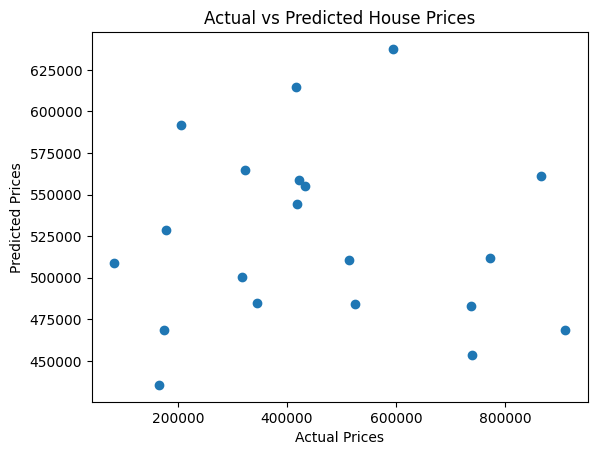

In [ ]:
y_pred = linear_model.predict(X_test)

print("\n * Linear Regression Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

new_house = np.array([[1800, 3, 2, 8.5]])
predicted_price = linear_model.predict(new_house)
print("\n * Predicted Price for New House:", predicted_price[0])

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

Task 2: Logistic Regression (Customer Churn Prediction)

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [ ]:
data = pd.read_csv("/content/LGR telecom_churn.csv")

df_churn = pd.DataFrame(data)
print(df_churn)

    MonthlyCharges    ContractType  TotalTenure  SupportRequests  Churn
0            26.53  Month-to-Month           19                4      1
1            65.88        One Year           11                0      1
2           141.05        Two Year           62                7      1
3            58.11        Two Year           61                0      1
4            92.12  Month-to-Month           63                1      0
..             ...             ...          ...              ...    ...
95           38.85  Month-to-Month           57                8      0
96           46.49  Month-to-Month           32                9      1
97           38.13  Month-to-Month           22                2      0
98          101.05  Month-to-Month           50                6      0
99           78.15        One Year            1                7      0

[100 rows x 5 columns]


In [ ]:
if "ContractType" in df_churn.columns:
    df_churn = pd.get_dummies(df_churn, columns=['ContractType'], drop_first=True)
else:
    print("Error: 'ContractType' column not found in the dataset!")

X_churn = df_churn[['MonthlyCharges', 'ContractType_One Year', 'ContractType_Two Year',  'TotalTenure', 'SupportRequests']]
y_churn = df_churn[['Churn']]


X_train, X_test, y_train, y_test = train_test_split(X_churn, y_churn, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

Error: 'ContractType' column not found in the dataset!


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = logistic_model.predict(X_test)

print("\n * Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


 * Logistic Regression Results:
Accuracy: 0.6

Confusion Matrix:
 [[10  0]
 [ 8  2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       1.00      0.20      0.33        10

    accuracy                           0.60        20
   macro avg       0.78      0.60      0.52        20
weighted avg       0.78      0.60      0.52        20



In [ ]:
new_customer = np.array([[75, 0, 0, 18, 2]])
churn_prediction = logistic_model.predict(new_customer)
print("\n * Will the New Customer Churn?", "Yes" if churn_prediction[0] == 1 else "No")


 * Will the New Customer Churn? Yes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


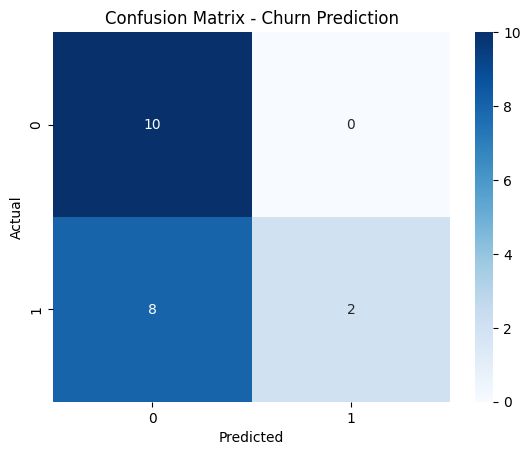

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues",
fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Churn Prediction")
plt.show()